In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the experiments.csv file into a pandas dataframe
df_experiments = pd.read_csv('experiments.csv', delimiter=';')

# Remove the timeouts and change them in the dataframe to 3600
df_experiments['TIME'] = df_experiments['TIME'].replace('timeout', 3601)
df_experiments['N_NODES'] = df_experiments['N_NODES'].replace('timeout', 50000000)
df_experiments['N_EDGES'] = df_experiments['N_EDGES'].replace('timeout', 50000000)
df_experiments['NUM_PRODUCTS'] = df_experiments['NUM_PRODUCTS'].replace('timeout', -1)

# For each model, calculate the average TIME, N_NODES and N_EDGES, grouping by AND_THRESHOLD
df_experiments['AND_OPTIMIZATION'] = df_experiments['AND_OPTIMIZATION'].astype(int)
df_experiments['TIME'] = df_experiments['TIME'].astype(float)
df_experiments['N_NODES'] = df_experiments['N_NODES'].astype(float)
df_experiments['N_EDGES'] = df_experiments['N_EDGES'].astype(float)
df_experiments['NUM_PRODUCTS'] = df_experiments['NUM_PRODUCTS'].astype('double')
df_experiments['AND_THRESHOLD'] = df_experiments['AND_THRESHOLD'].astype(int)

df_experiments_no_timeout = df_experiments[df_experiments['TIME'] < 3600]

res = df_experiments[~df_experiments['PATH'].str.contains('XOr')].groupby(['PATH', 'AND_THRESHOLD']).mean().reset_index()
res.drop(columns=['PATH'], inplace=True)

res_no_timeout = df_experiments_no_timeout[~df_experiments_no_timeout['PATH'].str.contains('XOr')].groupby(['PATH', 'AND_THRESHOLD']).mean().reset_index()
res_no_timeout.drop(columns=['PATH'], inplace=True)

# Print the maximum time
print(df_experiments['TIME'].max())

3601.0


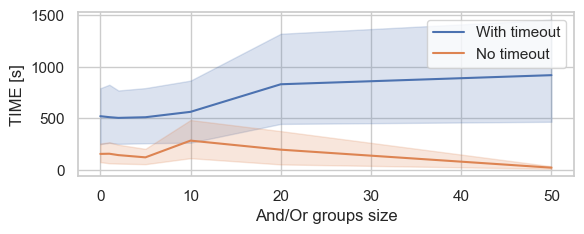

In [3]:
# Plot the TIME
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2.5))
ax = sns.lineplot(x='AND_THRESHOLD', y='TIME', data=res, label='With timeout')
ax = sns.lineplot(x='AND_THRESHOLD', y='TIME', data=res_no_timeout, label='No timeout')
ax.legend()
ax.set(xlabel='And/Or groups size', ylabel='TIME [s]')
plt.tight_layout()
plt.savefig('images/RQ1_time.pdf')


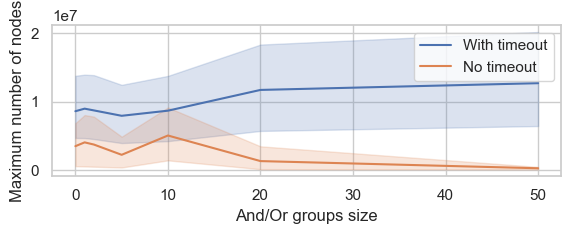

In [4]:
# Plot the N_NODES
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2.5))
ax=sns.lineplot(x='AND_THRESHOLD', y='N_NODES', data=res, label='With timeout')
ax=sns.lineplot(x='AND_THRESHOLD', y='N_NODES', data=res_no_timeout, label='No timeout')
ax.legend()
ax.set(xlabel='And/Or groups size', ylabel='Maximum number of nodes')
plt.tight_layout()
plt.savefig('images/RQ1_nodes.pdf')

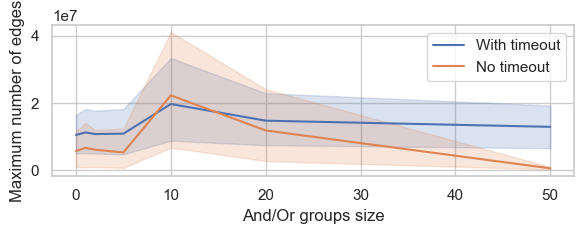

In [5]:
# Plot the N_EDGES
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2.5))
ax = sns.lineplot(x='AND_THRESHOLD', y='N_EDGES', data=res, label='With timeout')
ax = sns.lineplot(x='AND_THRESHOLD', y='N_EDGES', data=res_no_timeout, label='No timeout')
ax.legend()
ax.set(xlabel='And/Or groups size', ylabel='Maximum number of edges')
plt.tight_layout()
plt.savefig('images/RQ1_edges.pdf')